# Implementing various Decision Tree Classifiers using sklearn

**Importing necessary libraries and datasets**

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd

## On Continuous Valued Data Set

**Dividing the data into training set and testing set**

In [2]:
X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y)


**A) Using Entropy**

In [3]:
#creating the tree and fitting on the training data
DTC=DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

#Predicting values of test set
prediction=DTC.predict(X_test)

#calculating various metrics
print("\n-------------------------Accuracy Score----------------------------\n\t\t      ",metrics.accuracy_score(y_test, prediction, normalize= True))
print("\n---------------------Classification Report-------------------------\n",metrics.classification_report(y_test, prediction))
print("\n--------------------------Confusion Matrix-------------------------\n",metrics.confusion_matrix(y_test,prediction))


-------------------------Accuracy Score----------------------------
		       0.9473684210526315

---------------------Classification Report-------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.92        14
           2       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.96      0.95      0.95        38


--------------------------Confusion Matrix-------------------------
 [[13  0  0]
 [ 0 12  2]
 [ 0  0 11]]


**B) Using Gini Index**

In [4]:
#creating object , then fitting on train data
DTC=DecisionTreeClassifier(criterion='gini').fit(X_train,y_train)

#Predicting values of test set
prediction=DTC.predict(X_test)

#calculating metrics
print("\n-------------------------Accuracy Score----------------------------\n\t\t      ",metrics.accuracy_score(y_test, prediction, normalize= True))
print("\n---------------------Classification Report-------------------------\n",metrics.classification_report(y_test, prediction))
print("\n--------------------------Confusion Matrix-------------------------\n",metrics.confusion_matrix(y_test,prediction))


-------------------------Accuracy Score----------------------------
		       0.9473684210526315

---------------------Classification Report-------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.92        14
           2       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.96      0.95      0.95        38


--------------------------Confusion Matrix-------------------------
 [[13  0  0]
 [ 0 12  2]
 [ 0  0 11]]


## On Categorical Valued Data Set

**Dividing the data into training set and testing set**

In [5]:
#loading categorical data
data=pd.read_csv("car.data",names=['buying','maint','doors','persons','lug_boot','safety','class'])

#converting into int, by factorizing
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data['class'],class_names = pd.factorize(data['class'])

#splitting
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y)


**A) Using Entropy**

In [6]:
#creating object and fitting on train data
DTC=DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

#Predicting values 
prediction=DTC.predict(X_test)

#calculating metrics
print("\n-------------------------Accuracy Score----------------------------\n\t\t      ",metrics.accuracy_score(y_test, prediction, normalize= True))
print("\n---------------------Classification Report-------------------------\n",metrics.classification_report(y_test, prediction))
print("\n--------------------------Confusion Matrix-------------------------\n",metrics.confusion_matrix(y_test,prediction))


-------------------------Accuracy Score----------------------------
		       0.9884259259259259

---------------------Classification Report-------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       0.96      0.99      0.98       101
           2       1.00      0.94      0.97        16
           3       1.00      0.88      0.94        17

    accuracy                           0.99       432
   macro avg       0.99      0.95      0.97       432
weighted avg       0.99      0.99      0.99       432


--------------------------Confusion Matrix-------------------------
 [[297   1   0   0]
 [  1 100   0   0]
 [  0   1  15   0]
 [  0   2   0  15]]


**Tree Visualization for Entropy**

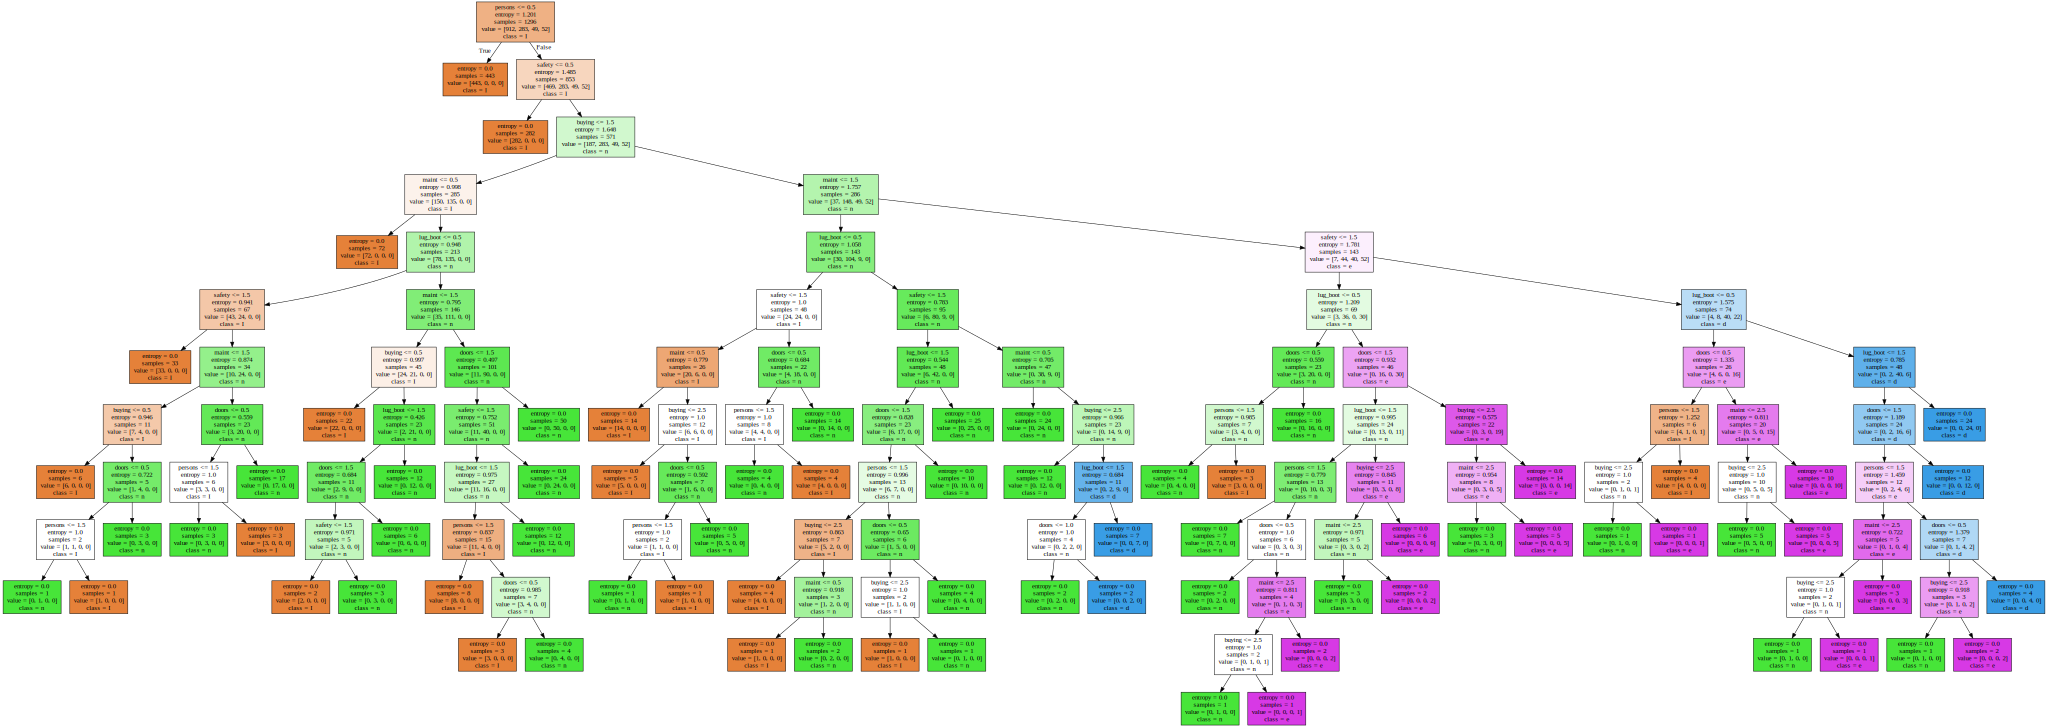

In [7]:
import graphviz
from sklearn import tree, metrics
feature_names = X.columns

data1 = tree.export_graphviz(DTC, out_file=None, filled=True,
                                feature_names=feature_names,  
                                class_names=str(class_names))
graph = graphviz.Source(data1)  
graph

**B) Using Gini Index**

In [8]:
#creating object and fitting on train data
DTC=DecisionTreeClassifier(criterion='gini').fit(X_train,y_train)

#Predicting values 
prediction=DTC.predict(X_test)

#calculating metrics
print("\n-------------------------Accuracy Score----------------------------\n\t\t      ",metrics.accuracy_score(y_test, prediction, normalize= True))
print("\n---------------------Classification Report-------------------------\n",metrics.classification_report(y_test, prediction))
print("\n--------------------------Confusion Matrix-------------------------\n",metrics.confusion_matrix(y_test,prediction))


-------------------------Accuracy Score----------------------------
		       0.9884259259259259

---------------------Classification Report-------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       0.96      0.99      0.98       101
           2       1.00      0.94      0.97        16
           3       1.00      0.88      0.94        17

    accuracy                           0.99       432
   macro avg       0.99      0.95      0.97       432
weighted avg       0.99      0.99      0.99       432


--------------------------Confusion Matrix-------------------------
 [[297   1   0   0]
 [  1 100   0   0]
 [  0   1  15   0]
 [  0   2   0  15]]


**Tree Visualization for Gini Index**

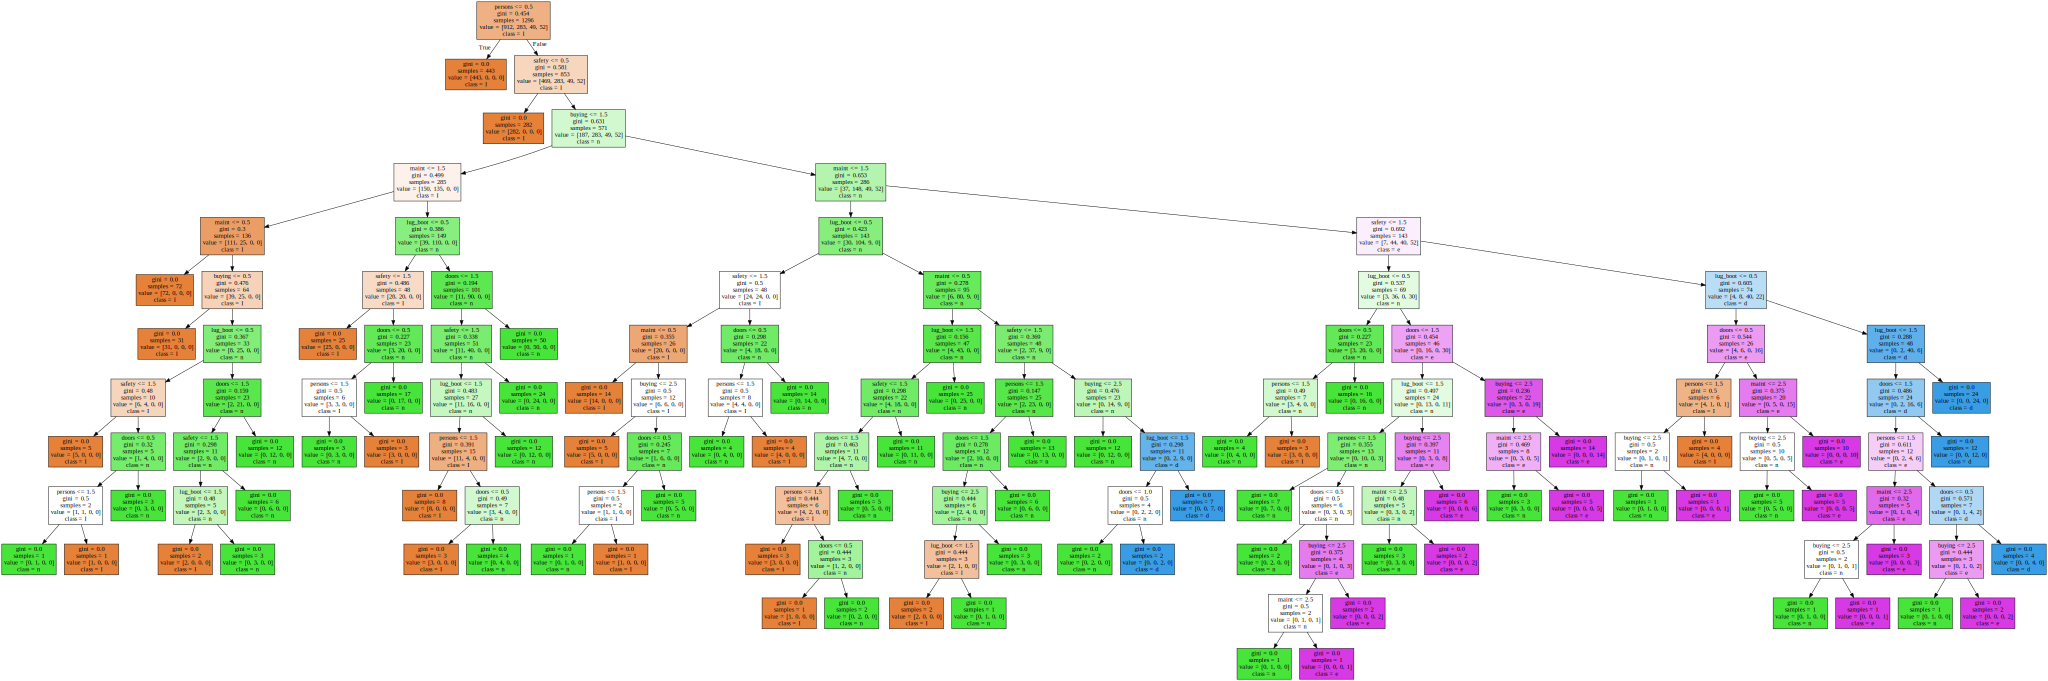

In [9]:
import graphviz
from sklearn import tree, metrics
feature_names = X.columns

data2 = tree.export_graphviz(DTC, out_file=None, filled=True,
                                feature_names=feature_names,  
                                class_names=str(class_names))
graph = graphviz.Source(data2)  
graph